In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp98fgoxur
  JVM stdout: /tmp/tmp98fgoxur/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp98fgoxur/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,09 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_unknownUser_yuo1sv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
data_path = "train_data__df2balanced_ultimate.csv"

# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
df

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
8,2,3,2,55,31.9855,31.9855,31.9855,0,50
2,2,3,2,55,18.4928,31.9855,31.9855,2,50
10,2,3,2,55,31.9855,38.4928,38.4928,2,50
26,2,3,2,55,27.3285,18.4928,37.3285,2,50
26,2,3,2,55,31.7464,37.3285,39.2464,2,50
23,2,3,2,55,33.4928,39.2464,40.3971,0,35.4403
32,3,3,2,55,34.3971,34.3971,18.4928,0,50
23,3,3,2,55,29.4976,31.9855,36.1643,2,53.2079
1,4,3,2,55,31.9855,27.3285,37.4265,2,7.81604
10,3,3,2,55,43.4928,29.4976,39.6232,2,50


In [4]:
df.describe()

Rows:318438
Cols:10

,Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
type,int,int,int,int,int,real,real,real,int,real
mins,1.0,1.0,1.0,0.0,5.0,17.328501414194704,18.39710084851682,9.497584040430686,0.0,7.816040607143563
mean,18.318840716246175,2.6256539734579403,1.9084625578605572,3.284099259510485,45.278531456672894,32.87907996529926,32.78353585024367,32.73685431924041,1.0862365672438592,50.26050156867248
maxs,32.0,4.0,3.0,32.0,95.0,43.49275212129206,43.56943676256436,40.39710084851682,2.0,112.9535469594144
sigma,8.633754885795048,0.8730604938237945,0.6628857004044935,1.7640613895592008,19.5852631260666,1.0316564756930553,4.116346744445843,1.7714040252455823,0.8472396401034684,5.769751288469396
zeros,0,0,0,22,0,0,0,0,101743,0
missing,0,0,0,0,0,0,0,0,0,0
0,8.0,2.0,3.0,2.0,55.0,31.985504242584117,31.985504242584117,31.985504242584117,0.0,50.0
1,2.0,2.0,3.0,2.0,55.0,18.492752121292057,31.985504242584117,31.985504242584117,2.0,50.0
2,10.0,2.0,3.0,2.0,55.0,31.985504242584117,38.49275212129206,38.49275212129206,2.0,50.0


In [5]:
y = "Stay"
x = df.columns
x.remove(y)

In [6]:
aml = H2OAutoML(max_runtime_secs = 3000, seed = 1)
#aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |█████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),20/41
# GBM base models (used / total),6/16
# XGBoost base models (used / total),12/15
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),0/7
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [7]:
lb = aml.leaderboard

In [8]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_4_AutoML_1_20230820_165843,0.696533,0.485158,0.549272,0.400647,0.485158
StackedEnsemble_AllModels_3_AutoML_1_20230820_165843,0.696555,0.485188,0.54915,0.40063,0.485188
StackedEnsemble_AllModels_2_AutoML_1_20230820_165843,0.698192,0.487472,0.549882,0.401573,0.487472
StackedEnsemble_AllModels_1_AutoML_1_20230820_165843,0.698235,0.487532,0.550093,0.401603,0.487532
StackedEnsemble_BestOfFamily_4_AutoML_1_20230820_165843,0.698647,0.488107,0.550287,0.401896,0.488107
StackedEnsemble_BestOfFamily_3_AutoML_1_20230820_165843,0.698905,0.488468,0.550485,0.402049,0.488468
StackedEnsemble_BestOfFamily_2_AutoML_1_20230820_165843,0.699044,0.488663,0.551297,0.402134,0.488663
StackedEnsemble_BestOfFamily_5_AutoML_1_20230820_165843,0.699475,0.489266,0.563066,0.403944,0.489266
StackedEnsemble_BestOfFamily_1_AutoML_1_20230820_165843,0.69997,0.489958,0.554526,0.402565,0.489958
GBM_4_AutoML_1_20230820_165843,0.700355,0.490498,0.554159,0.403046,0.490498


In [ ]:
# Get the top model of leaderboard
se = aml.leader

# Get the metalearner model of top model
metalearner = h2o.get_model(se.metalearner()['name']))

# list baselearner models :
metalearner.varimp()

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_1_20230820_165843_model_8,0.517117,0.26741,0.391251,0.305736,0.26741,22244,0.002273,XGBoost
DRF_1_AutoML_1_20230820_165843,0.546667,0.298844,0.42073,0.322872,0.298844,32989,0.010595,DRF
XGBoost_grid_1_AutoML_1_20230820_165843_model_2,0.588634,0.34649,0.45819,0.343137,0.34649,15795,0.002424,XGBoost
XRT_1_AutoML_1_20230820_165843,0.592425,0.350968,0.464128,0.349252,0.350968,28856,0.010942,DRF
XGBoost_1_AutoML_1_20230820_165843,0.604454,0.365364,0.473287,0.351158,0.365364,24647,0.002295,XGBoost
GBM_grid_1_AutoML_1_20230820_165843_model_4,0.61403,0.377033,0.490811,0.358559,0.377033,17197,0.018252,GBM
StackedEnsemble_AllModels_4_AutoML_1_20230820_165843,0.621268,0.385974,0.487147,0.361787,0.385974,5496,0.108992,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230820_165843,0.621288,0.385998,0.487056,0.361765,0.385998,5231,0.104717,StackedEnsemble
XGBoost_grid_1_AutoML_1_20230820_165843_model_4,0.635062,0.403303,0.498165,0.368522,0.403303,17306,0.001597,XGBoost
StackedEnsemble_BestOfFamily_2_AutoML_1_20230820_165843,0.639961,0.40955,0.50278,0.371983,0.40955,1012,0.019996,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

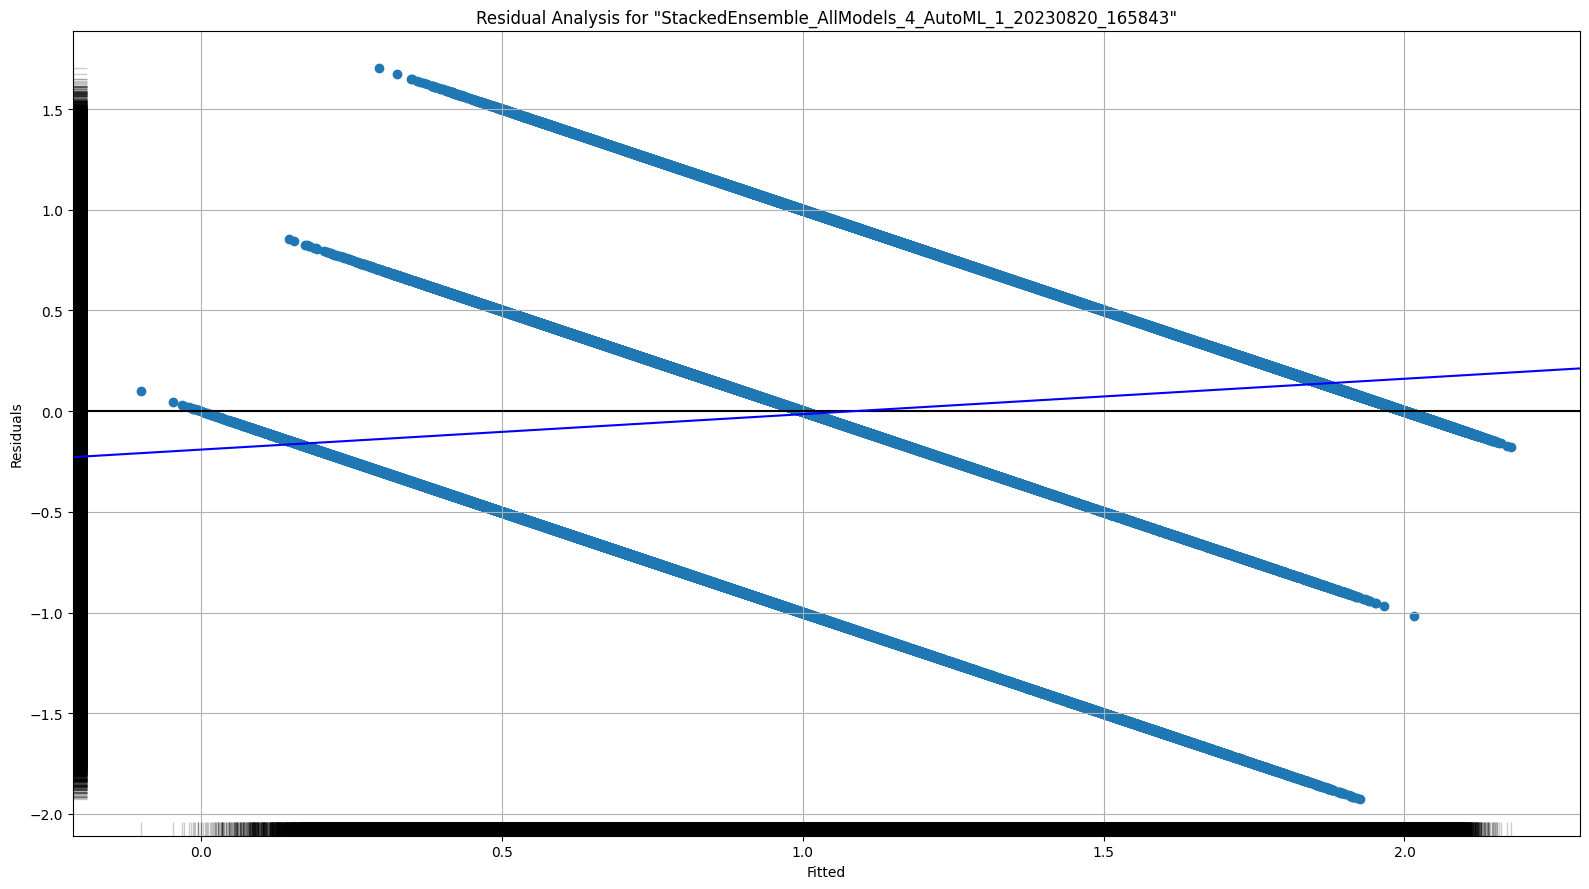

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

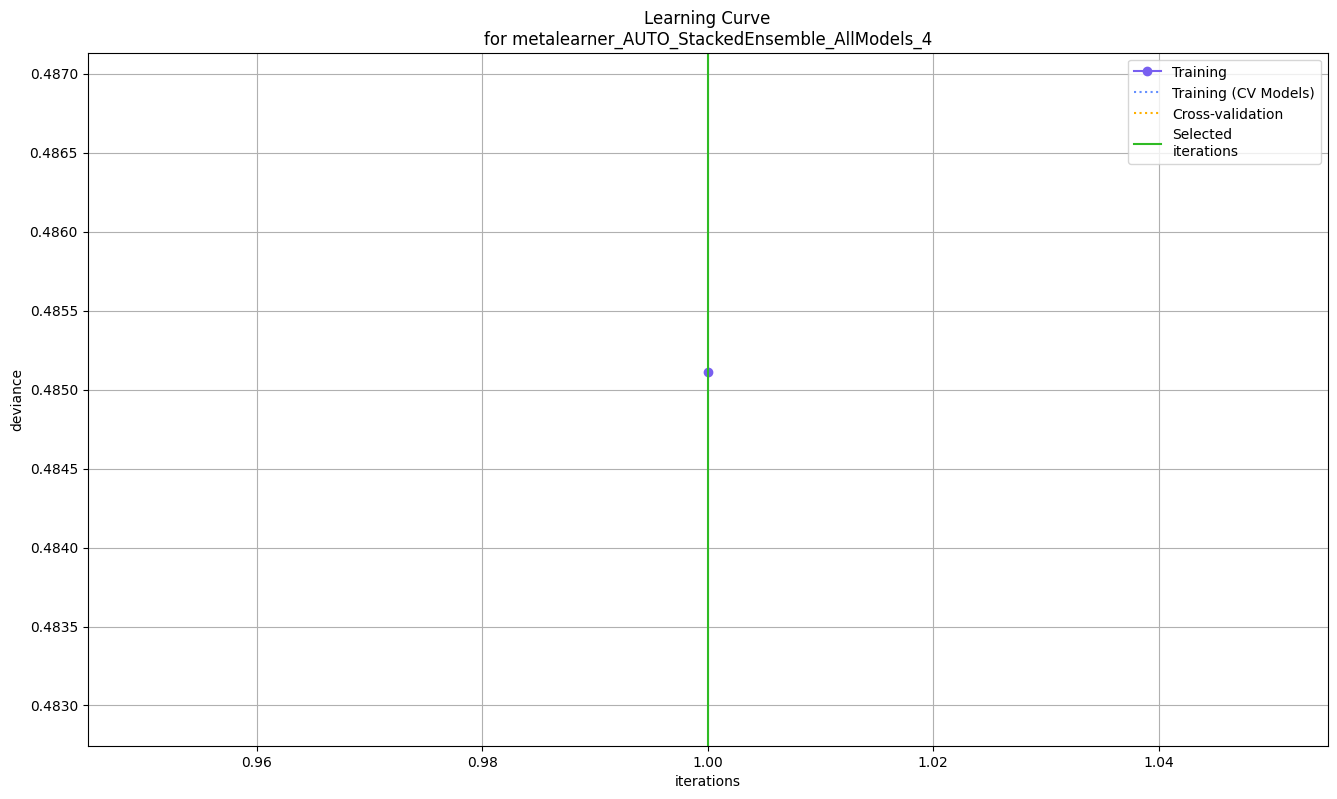

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

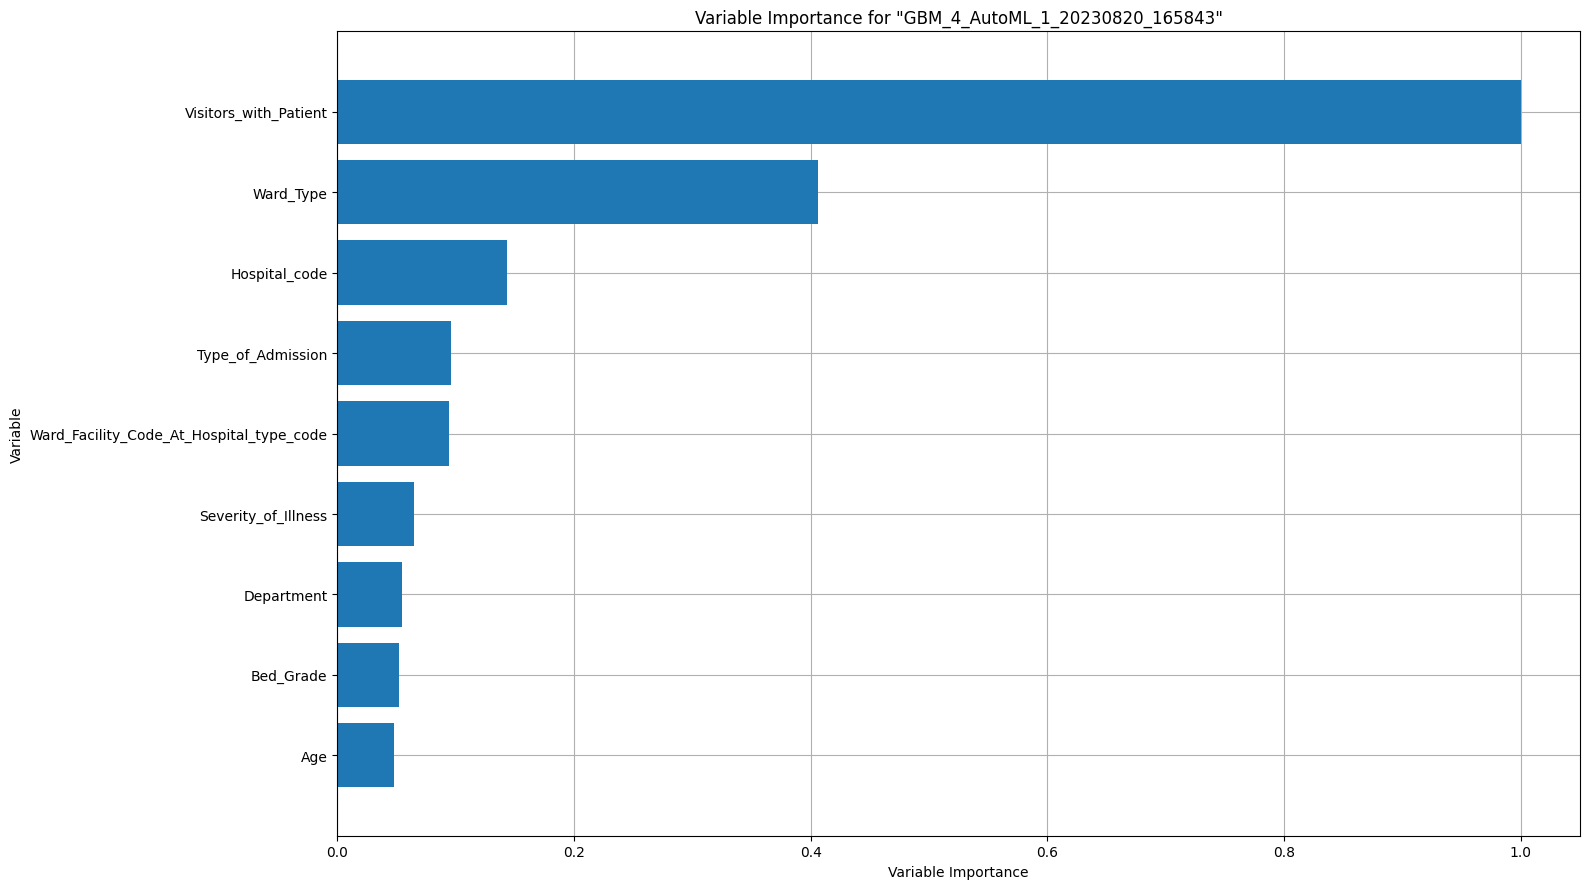

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

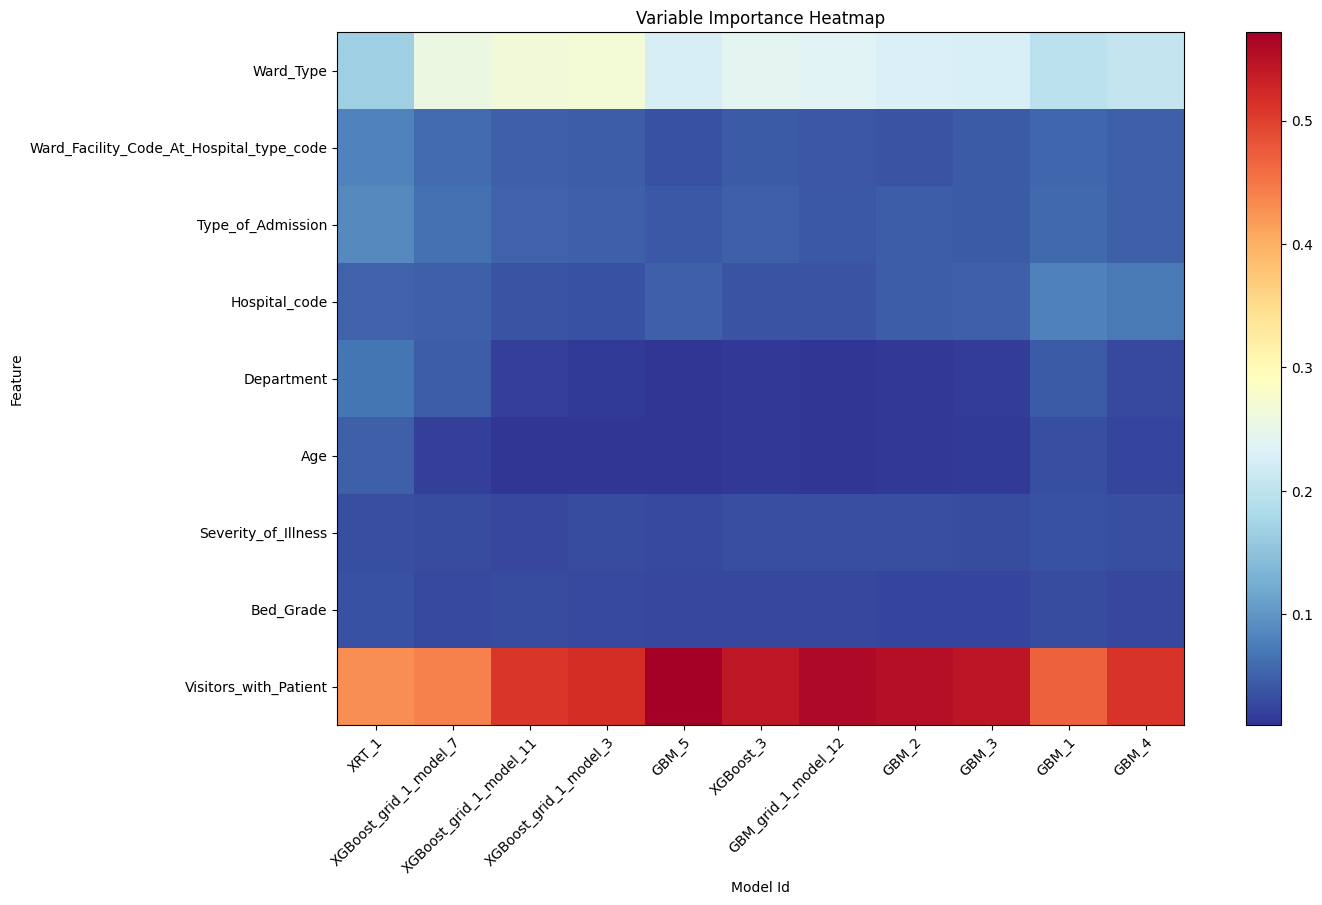

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

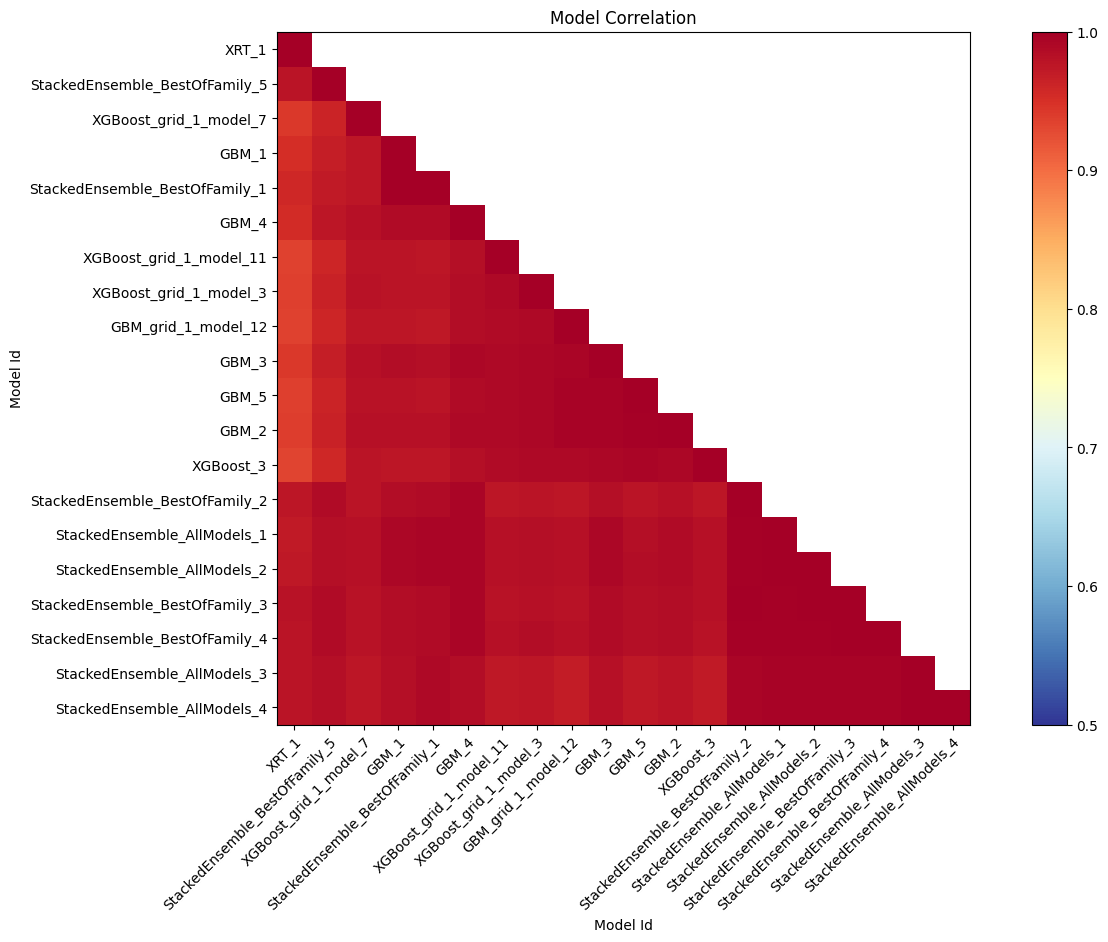

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

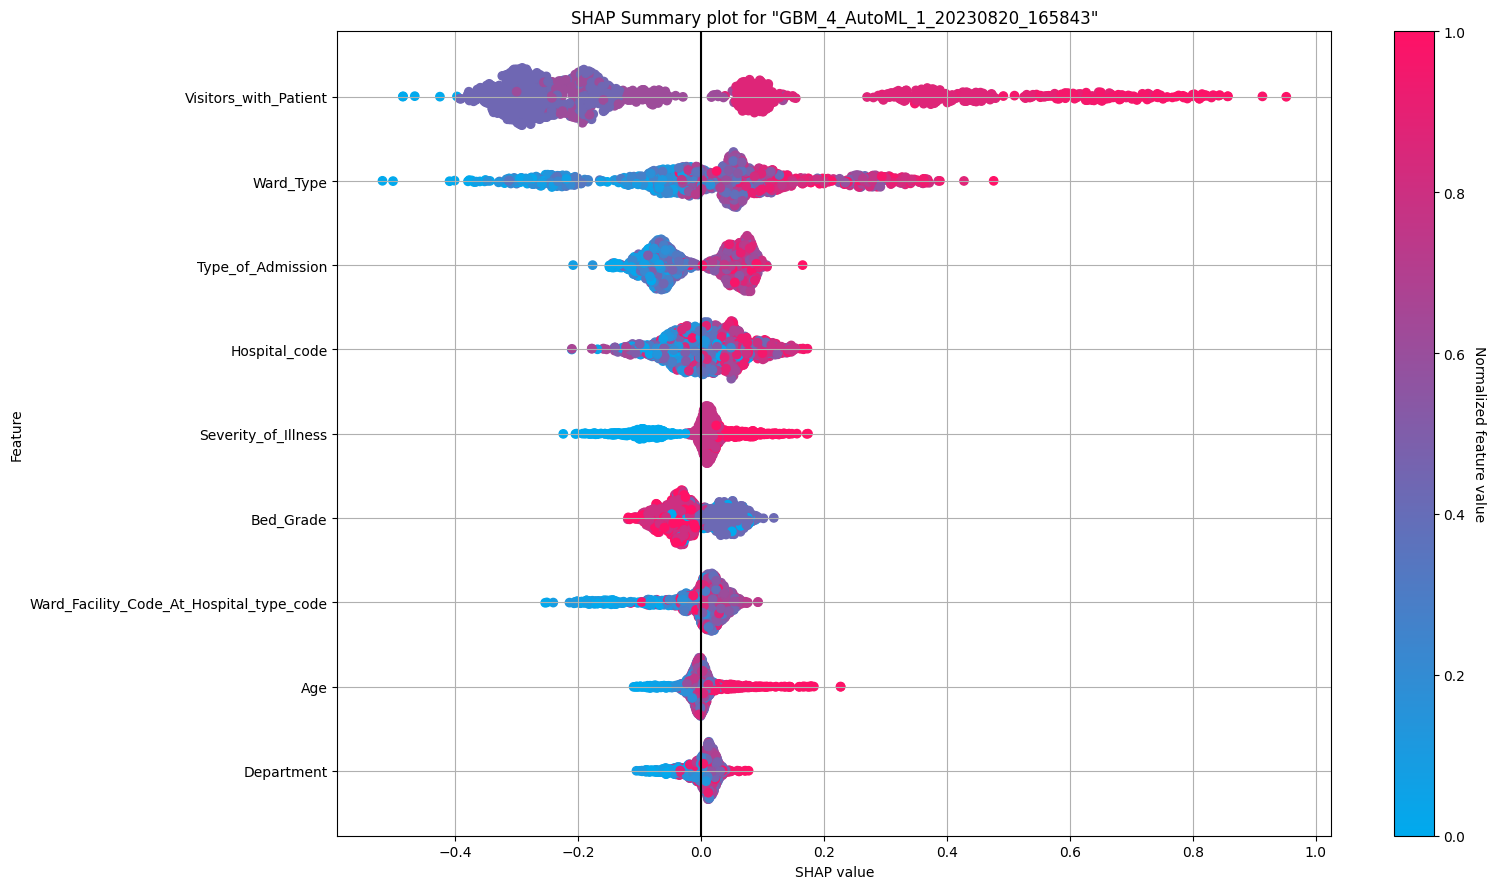

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [ ]:
aml.explain(df)